In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
human_data = pd.read_csv('input_csvs/human_phantasia_data.csv')
llm_data = pd.read_csv('input_csvs/llm_phantasia_data.csv')

In [3]:
human_data

,ResponseId,001 - Response,002 - Response,003 - Response,004 - Response,005 - Response,006 - Response,007 - Response,008 - Response,009 - Response,...,VVIQ - 07,VVIQ - 08,VVIQ - 09,VVIQ - 10,VVIQ - 11,VVIQ - 12,VVIQ - 13,VVIQ - 14,VVIQ - 15,VVIQ - 16
0,R_5vQ6Xf1WugueDND,NaN,NaN,NaN,NaN,two chairs,NaN,NaN,NaN,NaN,...,5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision,4. Clear and reasonably vivid,4. Clear and reasonably vivid,5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision,4. Clear and reasonably vivid
1,R_6D6PBkrChss508l,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5. Perfectly clear and as vivid as normal vision,4. Clear and reasonably vivid,4. Clear and reasonably vivid,4. Clear and reasonably vivid,3. Moderately clear and vivid,5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision,4. Clear and reasonably vivid,4. Clear and reasonably vivid
2,R_53qZezuj1Aowmel,ladder,comb,NaN,bra,NaN,NaN,NaN,NaN,NaN,...,5. Perfectly clear and as vivid as normal vision,2. Vague and dim,2. Vague and dim,2. Vague and dim,3. Moderately clear and vivid,3. Moderately clear and vivid,3. Moderately clear and vivid,4. Clear and reasonably vivid,3. Moderately clear and vivid,2. Vague and dim
3,R_6hazd14Iv0vRJV7,two squares,NaN,key,NaN,NaN,NaN,NaN,NaN,NaN,...,5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision,"1. No image at all, you only 'know' that you a...","1. No image at all, you only 'know' that you a...",4. Clear and reasonably vivid,"1. No image at all, you only 'know' that you a...",5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision
4,R_5KpdGyLKCFDJS5r,NaN,NaN,NaN,NaN,NaN,House,NaN,Butterfly,Mountain,...,5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision,2. Vague and dim,5. Perfectly clear and as vivid as normal vision,"1. No image at all, you only 'know' that you a...",5. Perfectly clear and as vivid as normal vision,4. Clear and reasonably vivid,4. Clear and reasonably vivid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,R_6RqfSAN0DF8nnsa,ladder,NaN,NaN,NaN,NaN,NaN,tree,NaN,NaN,...,5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision,4. Clear and reasonably vivid,3. Moderately clear and vivid,3. Moderately clear and vivid,3. Moderately clear and vivid,3. Moderately clear and vivid,4. Clear and reasonably vivid
96,R_1paSSMOwVWpJyn2,NaN,NaN,glasses,NaN,NaN,NaN,NaN,bow tie,NaN,...,4. Clear and reasonably vivid,4. Clear and reasonably vivid,3. Moderately clear and vivid,3. Moderately clear and vivid,2. Vague and dim,3. Moderately clear and vivid,4. Clear and reasonably vivid,4. Clear and reasonably vivid,4. Clear and reasonably vivid,4. Clear and reasonably vivid
97,R_7NhDTJ2fxewY5qh,NaN,Ladder,Circles,NaN,NaN,NaN,NaN,NaN,Butterfly,...,4. Clear and reasonably vivid,4. Clear and reasonably vivid,2. Vague and dim,3. Moderately clear and vivid,4. Clear and reasonably vivid,4. Clear and reasonably vivid,3. Moderately clear and vivid,4. Clear and reasonably vivid,5. Perfectly clear and as vivid as normal vision,3. Moderately clear and vivid
98,R_5RvyCf53JoQh7Eg,NaN,Ladder,NaN,No idea,The same as previous question,hourglass,Arrow,NaN,Butterfly,...,5. Perfectly clear and as vivid as normal vision,5. Perfectly cle

In [4]:
llm_data

,Model,59,58,57,56,55,54,53,52,51,...,38,39,40,41,42,43,44,45,46,47
0,Gemini 2.5 Pro Multiple Context (2025-07-21),arrow,anchor,Letter Z.,Verified icon,Planted sword.,key,sailboat,Shelf bracket,Birdhouse.,...,clubs symbol,owl,Letter B,Shopping cart,window,Royal scepter,Coffee cup,person,anchor,key
1,OpenAI o3 Multiple Context (2025-07-21),Arrow,Umbrella,Hourglass,Registered trademark,Martini glass,smoking pipe,Sailboat,Letter F,Television,...,clubs symbol,clubs suit,Coffee mug,coffee mug,Tic-tac-toe,Power button,Lollipop,key,Hourglass,Asclepius rod
2,OpenAI ChatGPT-4o Single Context (2025-07-25),arrow,Umbrella,kite,arrow,Location marker,music clef,keyhole,flagpole,crest,...,butterfly,butterfly,keyhole,Magnifying glass,window,keyhole,butterfly,Magnifying glass,butterfly,butterfly
3,GPT 4.1 Single Context (2025-07-21),arrowhead,Umbrella,Bow tie,Peace sign,Martini glass,music note,sailboat,flagpole,key,...,Mickey Mouse,Ice cream,flagpole,Flag pole,Pound sign,lollipop,Musical note,Magnifying glass,spade,Treble clef
4,Gemini 2.0 Flash Multiple Context (2025-07-21),arrowhead,Hanging scale,hashtag,Partial logo.,arrowhead,Paperclip,Golf club,crosshair,keyhole,...,snowman,Love knot,keyhole,Paperclip holder,grid,Snake donut,swan,Hanging target.,hourglass,Dollar sign
5,OpenAI o4-mini Single Context (2025-07-21),Bird feeder,Umbrella,Truss bridge,Power button,I see a vertical stem topped by a horizontal b...,Bottle opener,Pitching wedge,Step stool,Birdhouse,...,Owl,Scissors,Coffee mug,Staple gun,Pound sign,Eighth note,Sunglasses,key,mustache,Pulley
6,GPT 4.1 Single Context w/ Images (2025-07-21),bridge,Umbrella,Tape dispenser,arm,Pushpin icon,flag,Desk lamp,Letter F,keyhole,...,snowman,snowman,ear,key,hash sign,musical symbol,Swan,Magnifying glass,handcuffs,scissors
7,OpenAI ChatGPT-4o Multiple Context (2025-07-25),campfire,Elephant trunk,hourglass,arrow,anchor,music clef,Flag bracket,flagpole,figure,...,Owl,Abstract person,flagpole,chair,ladder,Dollar sign,snake,Magnifying glass,butterfly,Musical clef
8,OpenAI o3 Pro Multiple Context (2025-07-21),tree,Umbrella,Scissor jack,lowercase r,Martini glass,key,Sailboat,Letter F,television,...,clubs symbol,clubs suit,Coffee mug,Coffee mug,Tic-tac-toe,Power symbol,Magnifying glass,Magnifying glass,eight,Treble clef
9,GPT 4.1 Multiple Context (2025-07-21),Gymnastics apparatus,Musical clef,Railroad crossing,arm,anchor,Gas pump,Musical note,flagpole,keyhole,...,Ice cream,owl,bed,Pipe clamp,Hash sign,saxophone,Dollar sign,Magnifying glass,Treble clef,Dollar sign


In [5]:
crowdsourced_data = pd.read_csv('input_csvs/human_response_ranking_data.csv')
crowdsourced_data

,ResponseId,UserLanguage,Q1,PID,Metainfo_Browser,Metainfo_Version,Metainfo_Operating System,Metainfo_Resolution,Instructions Diamond,Instructions Vs,...,b60_q1374_house,b60_q1375_hut,b60_q1376_party hat,b60_q1377_roof,b60_q1378_television,b60_q1379_trapezium,b60_q1380_TV,Age,Gender,Language
0,R_7yOFgP0c0Kfd8aZ,EN,Accept,62e05a40c77214b0772d5596,Edge,138.0.0.0,Windows NT 10.0,1600x900,Completely,Moderatly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62,female,english
1,R_5yrOnDogUCzSTjL,EN,Accept,5dda9b9a9d9e30a06d320ffb,Edge,138.0.0.0,Windows NT 10.0,1360x768,Completely,A lot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43,Male,English
2,R_3jZ1B5pAuPBnE0S,EN,Accept,65ca9c729a13f898ae374552,Chrome,122.0.0.0,Macintosh,1284x605,A lot,Completely,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37,Female,English
3,R_7axyHC8c9d19RTG,EN,Accept,6734c699d11234d19b0be0ec,Chrome,138.0.0.0,Windows NT 10.0,1920x1080,Moderately,A lot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,Male,English
4,R_1zrZGpupYQtYXYJ,EN,Accept,669327c8eb71f9a6ca83eaab,Chrome,125.0.0.0,Macintosh,1440x900,Completely,Moderatly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,Male,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,R_5EEVwPAGKC7UsSL,EN,Accept,6738bbb49b751f21694bb4af,Chrome,138.0.0.0,Windows NT 10.0,1280x720,A lot,A lot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50,Woman,English
274,R_15x8SJt8vE97tVT,EN,Accept,6604664cb53a76971c8a1dce,Chrome,137.0.0.0,Macintosh,1920x1080,A lot,Moderatly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51,male,english
275,R_6MyV7x3J9zIxLEd,EN,Accept,605220735560745cf0a16a80,Firefox,141,Windows NT 10.0,1536x864,Completely,A lot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46,f,English
276,R_6PCYPS1TSISKRdD,EN,Accept,62fdd0e557fbc97b30b32ae3,Chrome,138.0.0.0,Macintosh,1440x900,A lot,A little,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38,male,english


In [6]:
def norm_text(s: str) -> str:
    """Lowercase + strip + collapse spaces; '' for None/NaN."""
    if s is None:
        return ""
    s = str(s).strip().lower()
    return re.sub(r"\s+", " ", s)


def parse_block(header: str) -> int | None:
    """
    Extract leading block number 1..60 from a column header.
    Accepts leading zeros and trailing text.
    """
    m = re.match(r'^\s*0*(\d+)', str(header))
    if not m:
        return None
    b = int(m.group(1))
    return b if 1 <= b <= 60 else None

# 1) Tidy Crowdsourced Data CSV

In [7]:
# Column regex
# Pattern like: b12_q345_label text
_COL_RE = re.compile(r'^(b\d+)_q(\d+)_([\s\S]+)$', re.IGNORECASE)

# Map text responses to numeric scale
TEXT_MAP = {
    "not at all": 1,
    "a little": 2,
    "moderately": 3,
    "a lot": 4,
    "completely": 5,
}

In [8]:
def _to_score(value: str) -> int | None:
    """
    Convert a text response to a numeric score 1..5.
    """
    if value is None:
        return None
    s = str(value).strip()
    if s == "" or s.lower() in {"na", "nan"}:
        return None
    m = re.match(r'^\s*(\d+)', s)
    if m:
        try:
            n = int(m.group(1))
            if 1 <= n <= 5:
                return n
        except ValueError:
            pass
    key = re.sub(r'^\d+\s*[\.\-:]\s*', '', s).lower().strip()
    return TEXT_MAP.get(key, None)

In [9]:
def identify_block_columns(df: pd.DataFrame) -> list:
    """

    :param df:
    :return:
    """

    # Identify block columns in order
    block_cols = []
    for idx, c in enumerate(df.columns):
        m = _COL_RE.match(c)
        if m:
            b, qid, label = m.groups()
            block_cols.append((idx, c, b, qid, label))
    return block_cols

In [10]:
def sort_blocks(block_cols: list) -> dict:
    """
    Sort blocks columns by block id in original position
    :param block_cols:
    :return:
    """
    by_block = {}
    for idx, c, b, qid, label in block_cols:
        by_block.setdefault(b, []).append((idx, c, qid, label))
    for b in by_block:
        by_block[b].sort(key=lambda t: t[0])
    return by_block

In [11]:
def iterate_over_blocks(row, block, resp_id):
    rows = []
    for b, items in block.items():
        repeat = 0
        for _, col, qid, label in items:
            raw = row.get(col, "")  # if the current cell is blank, respondent did not answer so move to next
            score = _to_score(raw)  # convert textual score to numberic
            if score is None:
                continue
            repeat += 1
            mnum = re.match(r'^b(\d+)$', b, re.IGNORECASE)
            block_num = int(mnum.group(1)) if mnum else None
            rows.append({
                "ResponseId": resp_id,
                "block": b,
                "block_num": block_num,
                "repeat_index": repeat,
                "qid": qid,
                "label": label,
                "score": score,
                "raw": raw,
            })
    return rows

In [12]:
def iterate_over_responses(by_block, df):
    """
    Iterate over each response
    :param by_block:
    :param df:
    :return:
    """
    rows = []
    for _, r in df.iterrows():
        resp_id = r.get("ResponseId")
        rows += iterate_over_blocks(r, by_block, resp_id)

    out = pd.DataFrame(rows)
    if not out.empty:
        out["repeat_index"] = pd.to_numeric(out["repeat_index"], errors="coerce")
        out = out.sort_values(by=["ResponseId", "block_num", "repeat_index"],
                              ascending=[True, True, True], na_position="last").reset_index(drop=True)
    return out

In [13]:
def tidy_block_scores(df) -> pd.DataFrame:
    block_cols = identify_block_columns(df)
    by_block = sort_blocks(block_cols)
    return iterate_over_responses(by_block, df)

In [14]:
tidy_crowdsourced_data = tidy_block_scores(crowdsourced_data)
tidy_crowdsourced_data

,ResponseId,block,block_num,repeat_index,qid,label,score,raw
0,R_10qMKOFXS2FbriN,b2,2,1,8,H,2,A little
1,R_10qMKOFXS2FbriN,b3,3,1,28,doorway,1,Not at all
2,R_10qMKOFXS2FbriN,b4,4,1,56,music notes,5,Completely
3,R_10qMKOFXS2FbriN,b4,4,2,59,spectacles,1,Not at all
4,R_10qMKOFXS2FbriN,b10,10,1,146,cyrillic letter,5,Completely
...,...,...,...,...,...,...,...,...
8335,R_7yOFgP0c0Kfd8aZ,b47,47,2,1118,musical clef,1,Not at all
8336,R_7yOFgP0c0Kfd8aZ,b53,53,1,1243,Boat,5,Completely
8337,R_7yOFgP0c0Kfd8aZ,b53,53,2,1251,musical note,1,Not at all
8338,R_7yOFgP0c0Kfd8aZ,b56,56,1,1316,verified icon,1,Not at all


In [15]:
tidy_crowdsourced_data.to_csv("output_csvs/tidy_crowdsourced_data.csv")

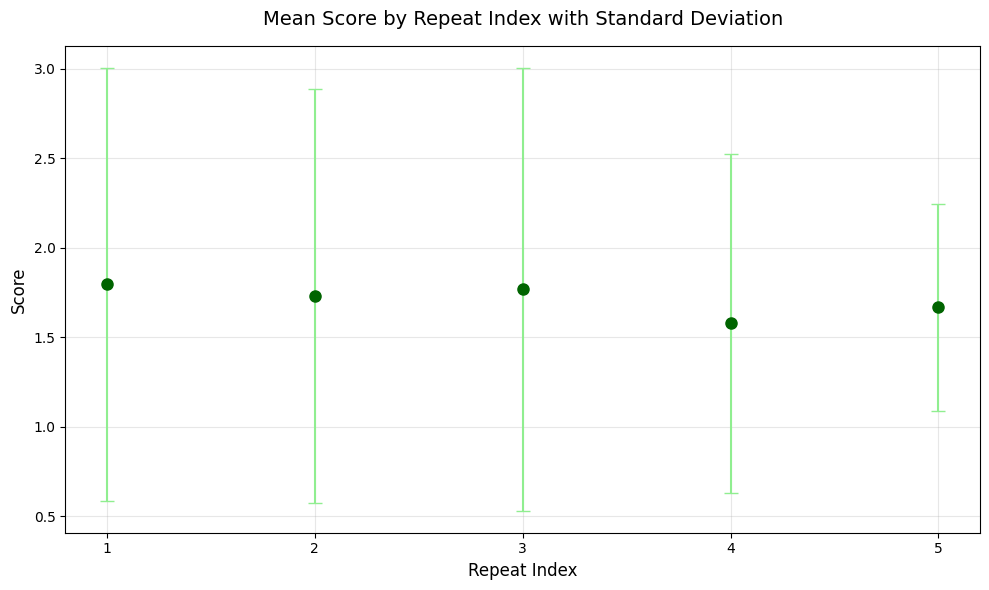

In [16]:
repeat_scores = tidy_crowdsourced_data.groupby('repeat_index')['score'].agg(['mean', 'std'])

plt.figure(figsize=(10, 6))
plt.errorbar(repeat_scores.index, repeat_scores['mean'],
             yerr=repeat_scores['std'], fmt='o', capsize=5,
             color='darkgreen', ecolor='lightgreen', markersize=8)
plt.title('Mean Score by Repeat Index with Standard Deviation', fontsize=14, pad=15)
plt.xlabel('Repeat Index', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 6))
plt.tight_layout()
plt.show()

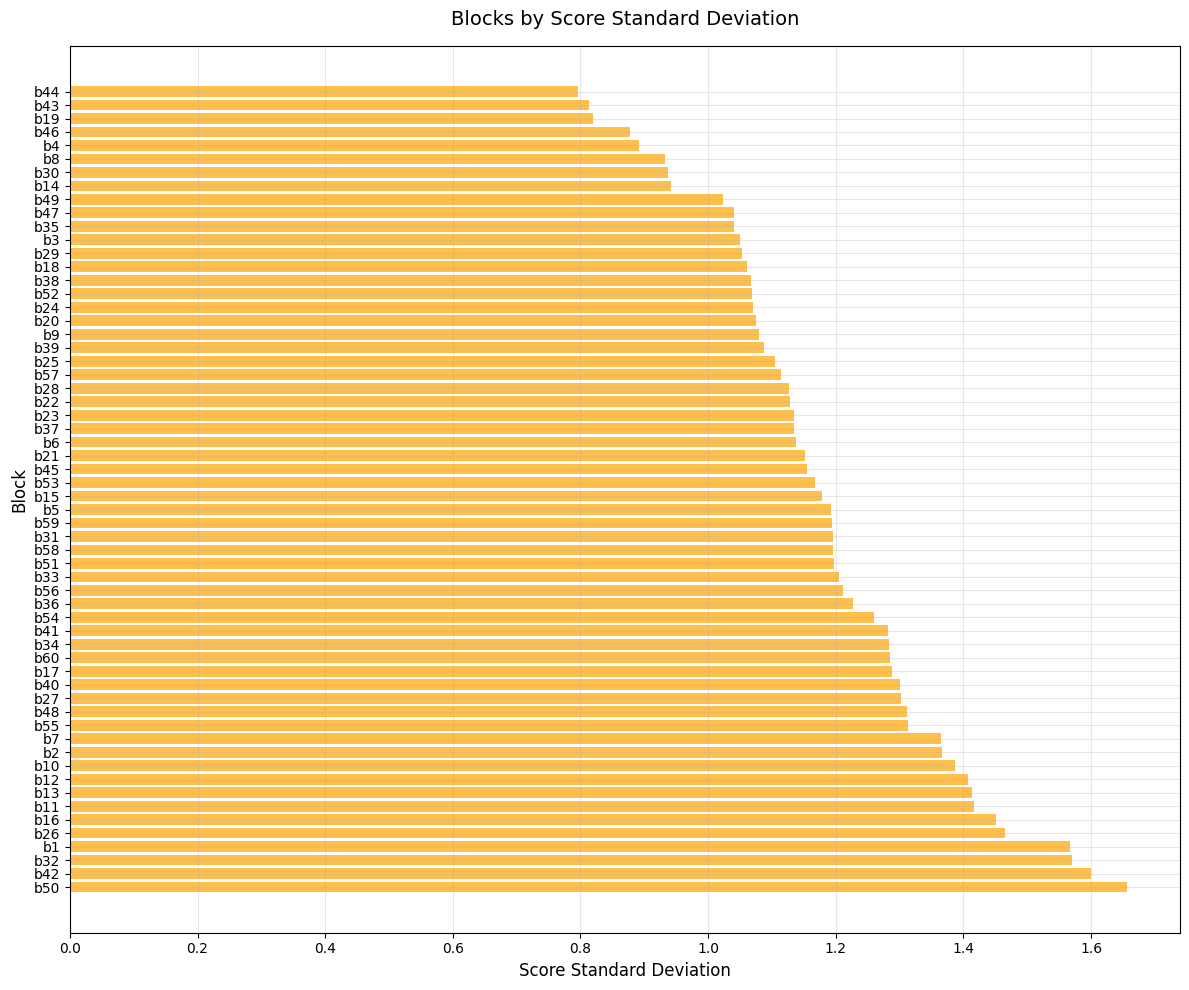

In [17]:
score_std = tidy_crowdsourced_data.groupby('block')['score'].std()
sorted_std = score_std.sort_values(ascending=False)

plt.figure(figsize=(12, 10))
plt.barh(range(len(sorted_std)), sorted_std.values, color='orange', alpha=0.7)
plt.title('Blocks by Score Standard Deviation', fontsize=14, pad=15)
plt.xlabel('Score Standard Deviation', fontsize=12)
plt.ylabel('Block', fontsize=12)
plt.yticks(range(len(sorted_std)), sorted_std.index)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

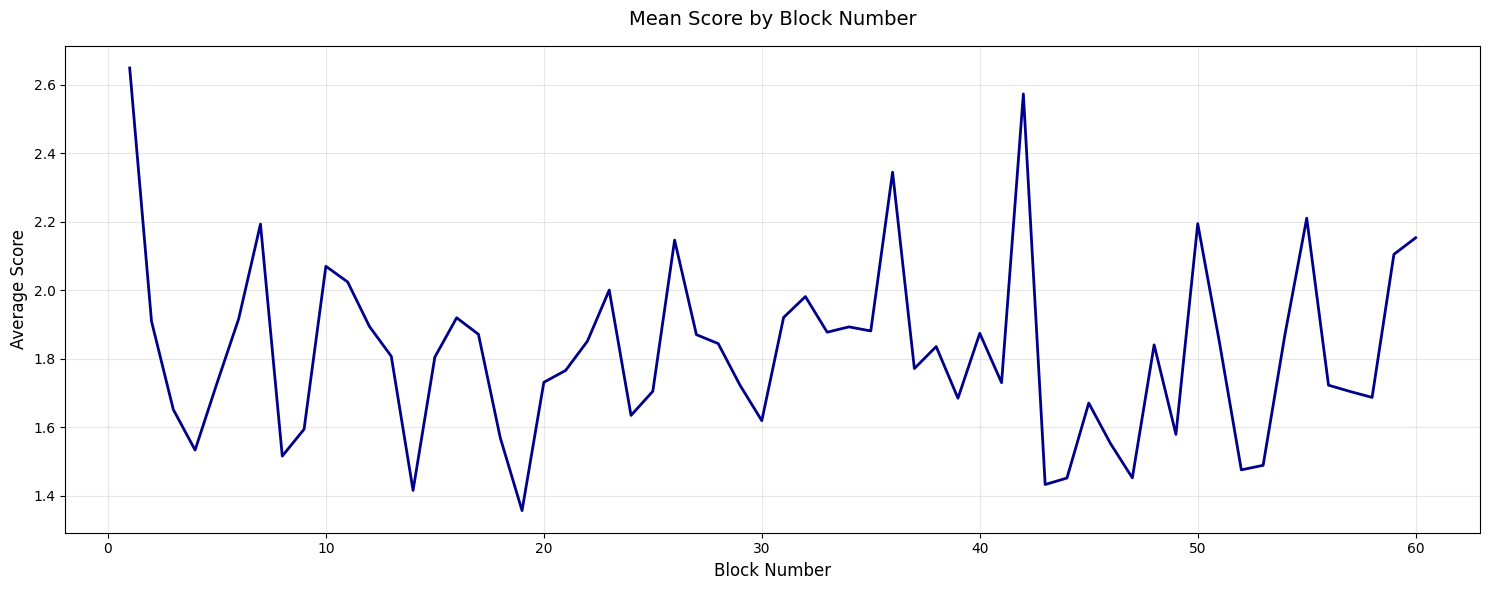

In [18]:
import matplotlib.pyplot as plt

score_by_block = tidy_crowdsourced_data.groupby('block_num')['score'].mean()

plt.figure(figsize=(15, 6))
plt.plot(score_by_block.index, score_by_block.values, color='darkblue', linewidth=2)
plt.title('Mean Score by Block Number', fontsize=14, pad=15)
plt.xlabel('Block Number', fontsize=12)
plt.ylabel('Average Score', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

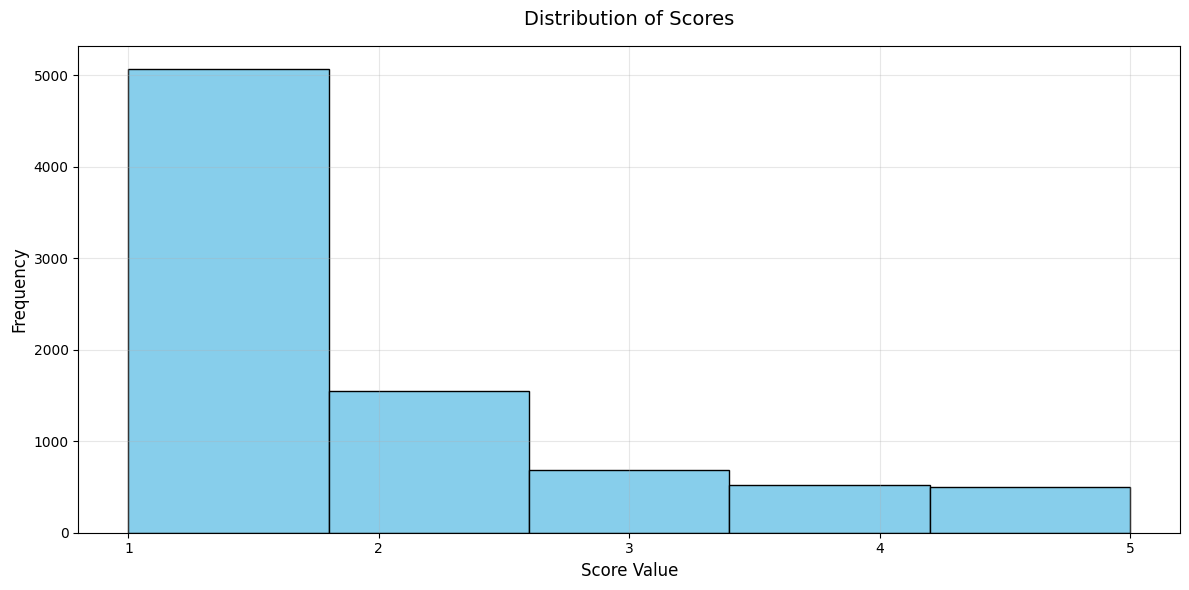

In [19]:
plt.figure(figsize=(12, 6))
plt.hist(tidy_crowdsourced_data['score'], bins=5, color='skyblue', edgecolor='black')
plt.title('Distribution of Scores', fontsize=14, pad=15)
plt.xlabel('Score Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 6))
plt.tight_layout()
plt.show()

# 2 ) Overall Mean Per Label and Per Block+QID

In [20]:
def values_wide_with_stats(df_tidy: pd.DataFrame) -> pd.DataFrame:
    """
    group_by: 'label' or 'blockqid'
    """
    df = df_tidy.copy()
    df["score"] = pd.to_numeric(df["score"], errors="coerce")
    df = df.dropna(subset=["score", "label"])
    df["label"] = df["label"].astype(str).str.strip()
    df["block_num"] = pd.to_numeric(df["block_num"], errors="coerce")
    df["qid"] = pd.to_numeric(df["qid"], errors="coerce")
    group_cols = ["block_num", "qid", "label"]
    index_cols = group_cols

    df["_seq"] = df.groupby(group_cols).cumcount() + 1
    wide = df.pivot_table(index=index_cols, columns="_seq", values="score", aggfunc="first")
    wide.columns = [f"value_{int(c)}" for c in wide.columns]
    wide = wide.reset_index()
    val_cols = [c for c in wide.columns if c.startswith("value_")]
    wide["mean_score"] = wide[val_cols].mean(axis=1, skipna=True)
    wide["sd_score"] = wide[val_cols].std(axis=1, ddof=0, skipna=True)
    return wide

In [21]:
CANON_WORDS = [
    "Ladder",
    "Ladder",
    "Glasses",
    "Glasses",
    "Glasses",
    "Glasses",
    "Pine Tree",
    "Butterfly",
    "Butterfly",
    "Comb - Pitchfork",
    "Comb - Pitchfork",
    "Goblet",
    "Goblet",
    "Computer Mouse",
    "House",
    "Ice cream",
    "Ice cream",
    "Ice cream",
    "Computer Mouse",
    "Crystal ball - Person Outline",
    "Crystal ball - Person Outline",
    "Fish",
    "Lollipop",
    "Chair",
    "Chair",
    "Flag",
    "Door",
    "Glasses",
    "Shovel",
    "Fish bones",
    "Balloon",
    "Goblet",
    "Plunger",
    "Bow tie - Owl",
    "Bow tie - Owl",
    "Broom",
    "Clubs symbol",
    "Clubs symbol - Ice cream",
    "Clubs symbol - Ice cream",
    "Mug",
    "Mug",
    "Window - Grid",
    "Mouse",
    "Computer Mouse",
    "Clock",
    "Lightbulb - Ice Cream",
    "Computer Mouse",
    "Letter T",
    "Heart",
    "Stick Figure",
    "Television",
    "Letter F",
    "Sailboat",
    "Music Note",
    "Yield Sign - Martini Glass",
    "Clock",
    "Hourglass",
    "Umbrella",
    "Pine tree",
    "House",
]

In [22]:
def add_canon_between_qid_label(df: pd.DataFrame) -> pd.DataFrame:
    df2 = df.copy()
    if "block_num" not in df2.columns:
        raise ValueError("add_canon_between_qid_label: requires a 'block_num' column.")
    df2["block_num"] = pd.to_numeric(df2["block_num"], errors="coerce")
    mapping = {i + 1: w for i, w in enumerate(CANON_WORDS)}
    df2["canon"] = df2["block_num"].map(mapping)
    if "qid" in df2.columns and "label" in df2.columns:
        cols = []
        for c in df2.columns:
            cols.append(c)
            if c == "qid":
                cols.append("canon")
        seen, ordered = set(), []
        for c in cols:
            if c not in seen:
                seen.add(c);
                ordered.append(c)
        df2 = df2[ordered]
    return df2

In [23]:
means_per_block_qid = values_wide_with_stats(tidy_crowdsourced_data)
means_with_canon = add_canon_between_qid_label(means_per_block_qid)
means_with_canon

,block_num,qid,canon,label,value_1,value_2,value_3,value_4,value_5,value_6,value_7,mean_score,sd_score
0,1,1,Ladder,door knob,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.000000,0.000000
1,1,2,Ladder,ladder,5.0,5.0,5.0,5.0,5.0,5.0,NaN,5.000000,0.000000
2,1,3,Ladder,stacked H's,4.0,2.0,3.0,3.0,1.0,3.0,NaN,2.666667,0.942809
3,1,4,Ladder,tower,2.0,4.0,1.0,1.0,1.0,1.0,1.0,1.571429,1.049781
4,1,5,Ladder,train track,4.0,3.0,2.0,5.0,4.0,4.0,NaN,3.666667,0.942809
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,60,1376,House,party hat,2.0,3.0,2.0,2.0,1.0,2.0,NaN,2.000000,0.577350
1376,60,1377,House,roof,2.0,3.0,1.0,2.0,4.0,3.0,NaN,2.500000,0.957427
1377,60,1378,House,television,1.0,1.0,1.0,2.0,1.0,1.0,NaN,1.166667,0.372678
1378,60,1379,House,trapezium,1.0,3.0,2.0,2.0,1.0,2.0,NaN,1.833333,0.687184


In [24]:
means_with_canon.to_csv("output_csvs/means_with_canon.csv")

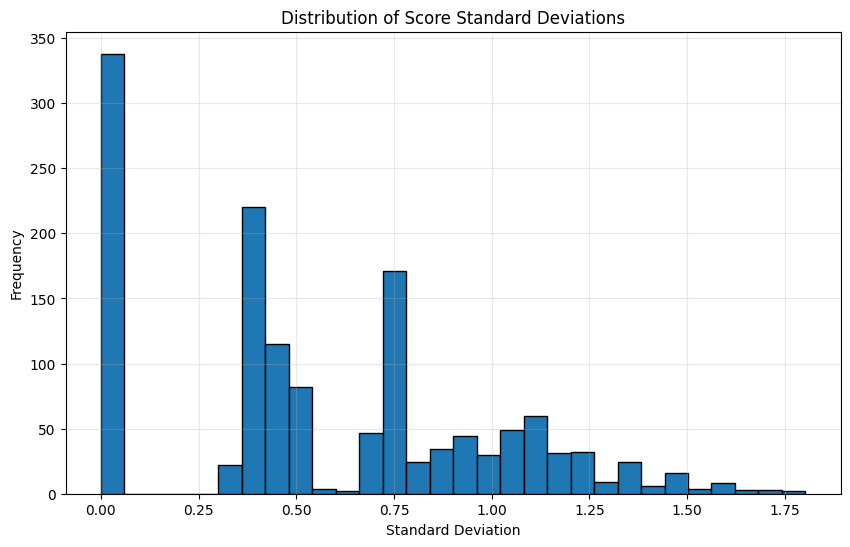

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(means_with_canon['sd_score'], bins=30, edgecolor='black')
plt.xlabel('Standard Deviation')
plt.ylabel('Frequency')
plt.title('Distribution of Score Standard Deviations')
plt.grid(True, alpha=0.3)

plt.show()

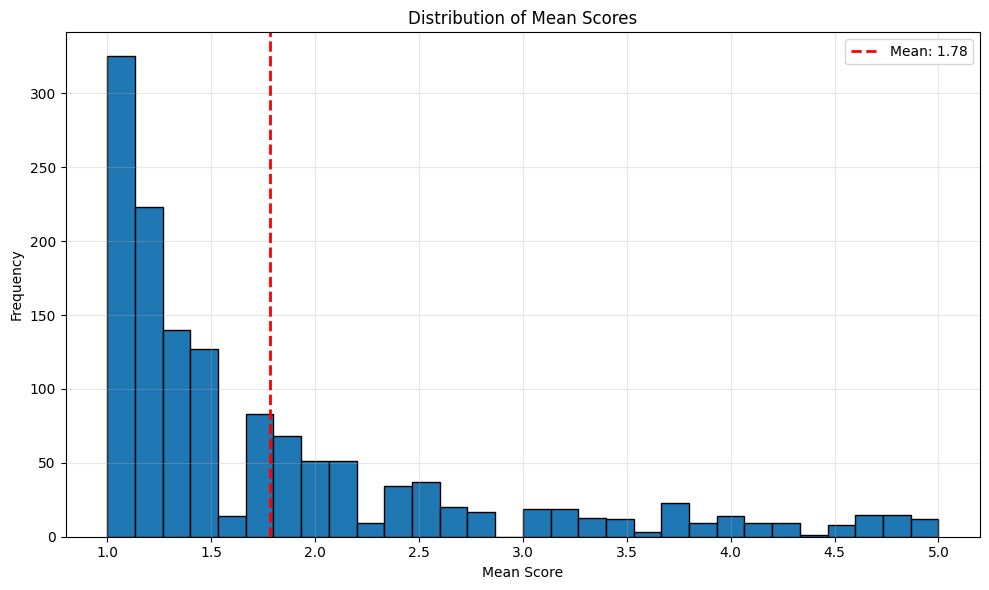

In [26]:
plt.figure(figsize=(10, 6))
plt.hist(means_with_canon['mean_score'], bins=30, edgecolor='black')
plt.axvline(means_with_canon['mean_score'].mean(), color='red', linestyle='dashed',
            linewidth=2, label=f'Mean: {means_with_canon["mean_score"].mean():.2f}')
plt.xlabel('Mean Score')
plt.ylabel('Frequency')
plt.title('Distribution of Mean Scores')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3 ) VVIQ Scores

In [27]:
def extract_leading_number(series: pd.Series) -> pd.Series:
    """
    From strings like '1 Very vivid' or '  4 - Barely vivid',
    extract the leading integer. Returns float with NaN on failure.
    """
    s = series.astype(str)
    # grab the first integer at the start of the string
    nums = s.str.extract(r'^\s*(\d+)')[0]
    return pd.to_numeric(nums, errors="coerce")

In [28]:
def get_vviq_scores(df: pd.DataFrame) -> pd.DataFrame:
    vviq_column_regex = r'^VVIQ\s*[-–]\s*\d{2}$'
    vviq_columns = [c for c in df.columns if re.match(vviq_column_regex, c)]
    if not vviq_columns:
        raise ValueError("get_VVIQ_scores: no vviq columns")
    vviq_numeric = pd.DataFrame(
        {c: extract_leading_number(df[c]) for c in vviq_columns}
    )
    base = df[['ResponseId']].copy()
    scored = pd.concat([base, vviq_numeric], axis=1)
    scored.insert(loc=1, column='VVIQ_sum', value=vviq_numeric.sum(axis=1, min_count=1))
    scored.insert(loc=2, column='VVIQ_mean', value=vviq_numeric.mean(axis=1))
    scored.insert(loc=3, column='VVIQ_std', value=vviq_numeric.std(axis=1, ddof=1))
    return scored

In [29]:
pre_vviq = human_data.reset_index(drop=True)
vviq_scores = get_vviq_scores(pre_vviq)
vviq_scores

,ResponseId,VVIQ_sum,VVIQ_mean,VVIQ_std,VVIQ - 01,VVIQ - 02,VVIQ - 03,VVIQ - 04,VVIQ - 05,VVIQ - 06,VVIQ - 07,VVIQ - 08,VVIQ - 09,VVIQ - 10,VVIQ - 11,VVIQ - 12,VVIQ - 13,VVIQ - 14,VVIQ - 15,VVIQ - 16
0,R_5vQ6Xf1WugueDND,70,4.3750,0.718795,3,4,3,4,4,5,5,5,5,5,4,4,5,5,5,4
1,R_6D6PBkrChss508l,71,4.4375,0.629153,5,4,5,5,4,5,5,4,4,4,3,5,5,5,4,4
2,R_53qZezuj1Aowmel,49,3.0625,0.928709,4,3,2,4,3,4,5,2,2,2,3,3,3,4,3,2
3,R_6hazd14Iv0vRJV7,56,3.5000,1.825742,1,1,4,3,5,5,5,5,1,1,4,1,5,5,5,5
4,R_5KpdGyLKCFDJS5r,61,3.8125,1.515201,4,2,1,3,5,5,5,5,5,5,2,5,1,5,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,R_6RqfSAN0DF8nnsa,63,3.9375,0.771902,4,4,3,4,4,4,5,5,5,5,4,3,3,3,3,4
96,R_1paSSMOwVWpJyn2,53,3.3125,0.793200,3,3,2,2,4,4,4,4,3,3,2,3,4,4,4,4
97,R_7NhDTJ2fxewY5qh,53,3.3125,1.014479,2,3,1,4,3,4,4,4,2,3,4,4,3,4,5,3
98,R_5RvyCf53JoQh7Eg,71,4.4375,0.629153,4,4,3,4,5,5,5,5,4,4,5,4,5,5,5,4


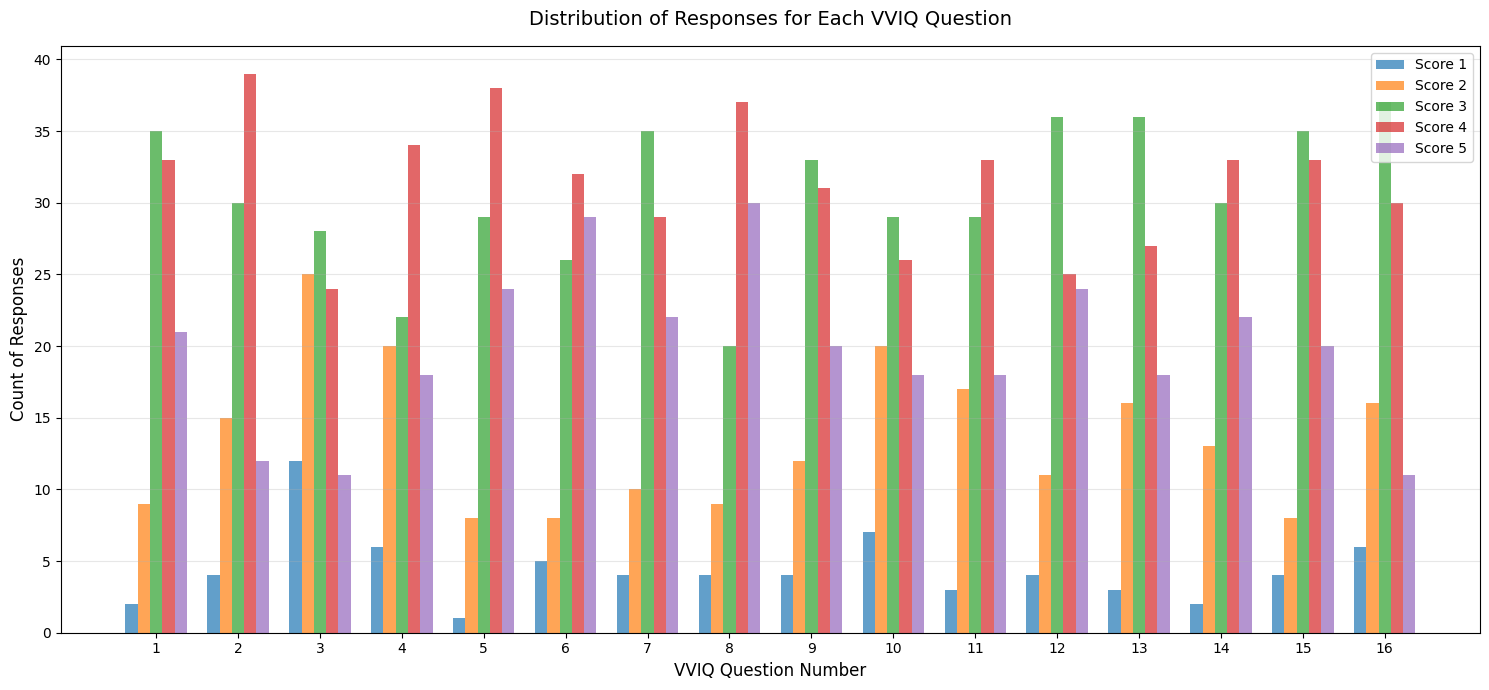

In [30]:
response_counts = {i: [len(vviq_scores[vviq_scores[f'VVIQ - {str(j).zfill(2)}'] == i])
                       for j in range(1, 17)] for i in range(1, 6)}

x = np.arange(1, 17)
width = 0.15
multiplier = 0

fig, ax = plt.subplots(figsize=(15, 7))

for response, counts in response_counts.items():
    offset = width * multiplier
    ax.bar(x + offset, counts, width, label=f'Score {response}', alpha=0.7)
    multiplier += 1

ax.set_xlabel('VVIQ Question Number', fontsize=12)
ax.set_ylabel('Count of Responses', fontsize=12)
ax.set_title('Distribution of Responses for Each VVIQ Question', fontsize=14, pad=15)
ax.set_xticks(x + width * 2)
ax.set_xticklabels(range(1, 17))
ax.legend(loc='upper right')
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

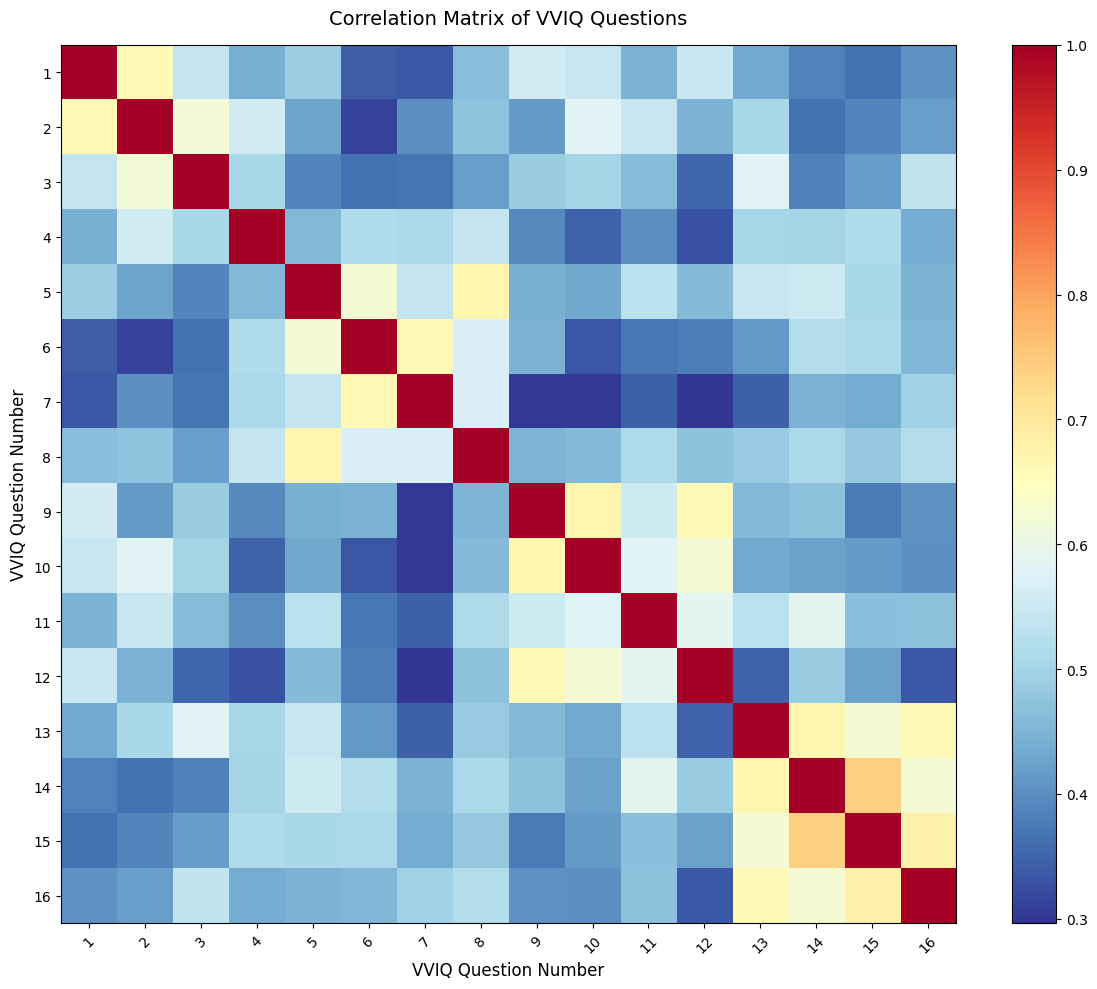

In [31]:
correlations = vviq_scores[[f'VVIQ - {str(i).zfill(2)}' for i in range(1, 17)]].corr()

plt.figure(figsize=(12, 10))
im = plt.imshow(correlations, cmap='RdYlBu_r', aspect='auto')
plt.colorbar(im)
plt.xticks(range(16), range(1, 17), rotation=45)
plt.yticks(range(16), range(1, 17))
plt.xlabel('VVIQ Question Number', fontsize=12)
plt.ylabel('VVIQ Question Number', fontsize=12)
plt.title('Correlation Matrix of VVIQ Questions', fontsize=14, pad=15)
plt.tight_layout()
plt.show()

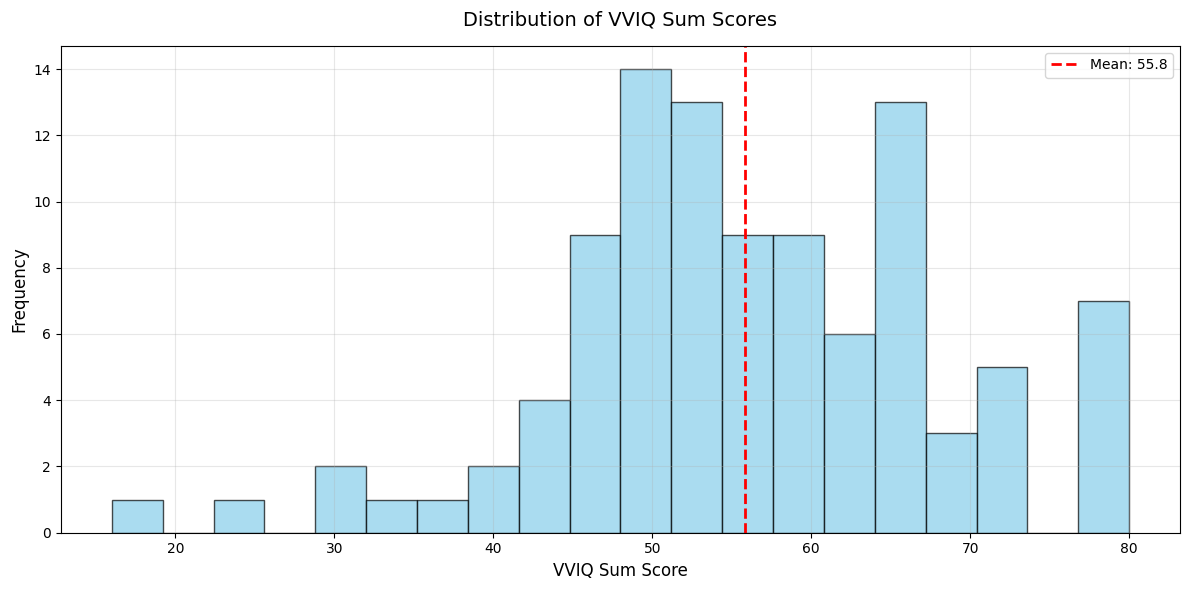

In [32]:
plt.figure(figsize=(12, 6))
plt.hist(vviq_scores['VVIQ_sum'], bins=20, edgecolor='black', alpha=0.7, color='skyblue')
plt.axvline(vviq_scores['VVIQ_sum'].mean(), color='red', linestyle='dashed', linewidth=2,
            label=f'Mean: {vviq_scores["VVIQ_sum"].mean():.1f}')
plt.xlabel('VVIQ Sum Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of VVIQ Sum Scores', fontsize=14, pad=15)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [33]:
vviq_scores.to_csv("output_csvs/vviq_scores.csv")

# 4) Grading

In [34]:
def norm_text(s: str) -> str:
    """Lowercase + strip + collapse internal whitespace. Returns '' for None/NaN."""
    if s is None:
        return ""
    s = str(s).strip().lower()
    return re.sub(r"\s+", " ", s)


def parse_block(col_name: str):
    """
    Extract leading block number from a header.
      '01' -> 1
      '01 - Block' -> 1
      '5_block' -> 5
      '060 final' -> 60
    Returns int in 1..60 or None.
    """
    m = re.match(r'^\s*0*(\d+)', str(col_name))
    if not m:
        return None
    bnum = int(m.group(1))
    return bnum if 1 <= bnum <= 60 else None


In [35]:
def sort_blocks(df):
    block_cols = []
    for i, col in enumerate(df.columns):
        if col == 'ResponseId' or col == 'Model':
            continue
        bnum = parse_block(col)
        if bnum is not None:
            block_cols.append((col, bnum, i))
    block_cols.sort(key=lambda t: t[2])  # preserve file order
    return block_cols

In [36]:
def build_lookup(df):
    new_df = pd.DataFrame()
    new_df["_block_num"] = pd.to_numeric(df["block_num"], errors="coerce")
    new_df["_label_norm"] = df["label"].map(norm_text)
    new_df["_mean_score"] = pd.to_numeric(df["mean_score"], errors="coerce")
    new_df["_mc1"] = pd.to_numeric(df["value_1"], errors="coerce")
    new_df["_mc2"] = pd.to_numeric(df["value_2"], errors="coerce")
    new_df["_mc3"] = pd.to_numeric(df["value_3"], errors="coerce")
    new_df["_mc4"] = pd.to_numeric(df["value_4"], errors="coerce")
    new_df["_mc5"] = pd.to_numeric(df["value_5"], errors="coerce")
    new_df["_mc6"] = pd.to_numeric(df["value_6"], errors="coerce")
    new_df["_mc7"] = pd.to_numeric(df["value_7"], errors="coerce")
    return {(int(b), l): [float(m), float(mc1), float(mc2), float(mc3), float(mc4), float(mc5), float(mc6), float(mc7)]
            for b, l, m, mc1, mc2, mc3, mc4, mc5, mc6, mc7 in new_df.itertuples(index=False, name=None)}

In [37]:
def grade(responses_df, means_df, key_col) -> (pd.DataFrame, pd.DataFrame, pd.DataFrame):
    usable_means = build_lookup(means_df)
    block_cols = sort_blocks(responses_df)
    result_list = []
    full_results = []
    ungraded_results = []
    for _, row in responses_df.iterrows():
        key_val = row[key_col]
        total = 0.0
        n_total = 0
        n_graded = 0
        n_ungraded = 0
        for col, bnum, _ in block_cols:
            label_original = str(row.get(col, "")).strip()
            if label_original == "nan":
                continue
            n_total += 1
            label_norm = norm_text(label_original)
            mean_with_components = usable_means.get((bnum, label_norm))
            if mean_with_components is None:
                total += 1
                n_ungraded += 1
                ungraded_results.append(
                    {
                        key_col: key_val,
                        "label": label_norm,
                        "raw": label_original,
                    }
                )
            else:
                n_graded += 1
                total += mean_with_components[0]
                full_results.append(
                    {key_col: key_val,
                     "label": label_norm,
                     "raw": label_original,
                     "mean": mean_with_components[0],
                     "ranking_1": mean_with_components[1],
                     "ranking_2": mean_with_components[2],
                     "ranking_3": mean_with_components[3],
                     "ranking_4": mean_with_components[4],
                     "ranking_5": mean_with_components[5],
                     "ranking_6": mean_with_components[6],
                     "ranking_7": mean_with_components[7],
                     })

        result_list.append({key_col: key_val, "overall_score": total, "n_graded": n_graded, "n_ungraded": n_ungraded,
                            "n_total": n_total, "mean_score_per_item": total / n_total})
    return pd.DataFrame(result_list), pd.DataFrame(full_results), pd.DataFrame(ungraded_results)

In [38]:
h_graded_results, h_full_results, h_ungraded_results = grade(human_data, means_with_canon, "ResponseId")

In [39]:
h_graded_results

,ResponseId,overall_score,n_graded,n_ungraded,n_total,mean_score_per_item
0,R_5vQ6Xf1WugueDND,29.261905,14,1,15,1.950794
1,R_6D6PBkrChss508l,30.166667,13,2,15,2.011111
2,R_53qZezuj1Aowmel,25.142857,15,0,15,1.676190
3,R_6hazd14Iv0vRJV7,28.380952,15,0,15,1.892063
4,R_5KpdGyLKCFDJS5r,28.476190,15,0,15,1.898413
...,...,...,...,...,...,...
95,R_6RqfSAN0DF8nnsa,44.576190,15,0,15,2.971746
96,R_1paSSMOwVWpJyn2,46.285714,15,0,15,3.085714
97,R_7NhDTJ2fxewY5qh,34.366667,15,0,15,2.291111
98,R_5RvyCf53JoQh7Eg,43.180952,13,2,15,2.878730


Human overall mean score per item: 2.5349163964651282


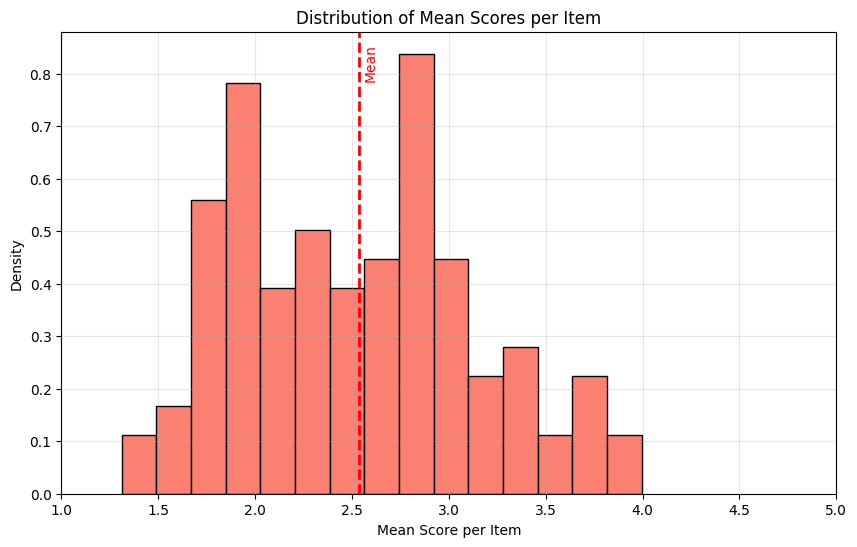

In [40]:
h_overall_mean = h_graded_results['overall_score'].sum() / h_graded_results['n_total'].sum()
print("Human overall mean score per item:", h_overall_mean)

plt.figure(figsize=(10, 6))
plt.hist(h_graded_results['mean_score_per_item'], bins=15, color='salmon',
         edgecolor='black', density=True)
plt.axvline(h_overall_mean, color='red',
            linestyle='dashed', linewidth=2)
plt.text(h_overall_mean.mean() * 1.01,
         plt.ylim()[1] * 0.9, 'Mean', rotation=90, color='red')
plt.title('Distribution of Mean Scores per Item')
plt.xlabel('Mean Score per Item')
plt.xlim((1, 5))
plt.ylabel('Density')
plt.grid(True, alpha=0.3)
plt.show()

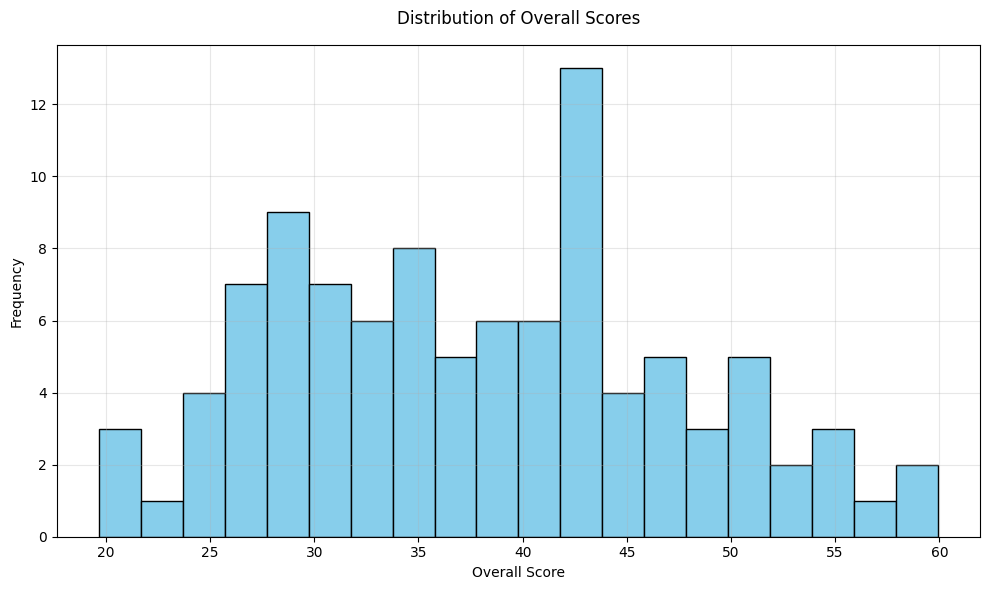

In [41]:
plt.figure(figsize=(10, 6))
plt.hist(h_graded_results['overall_score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Overall Scores', pad=15, fontsize=12)
plt.xlabel('Overall Score', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

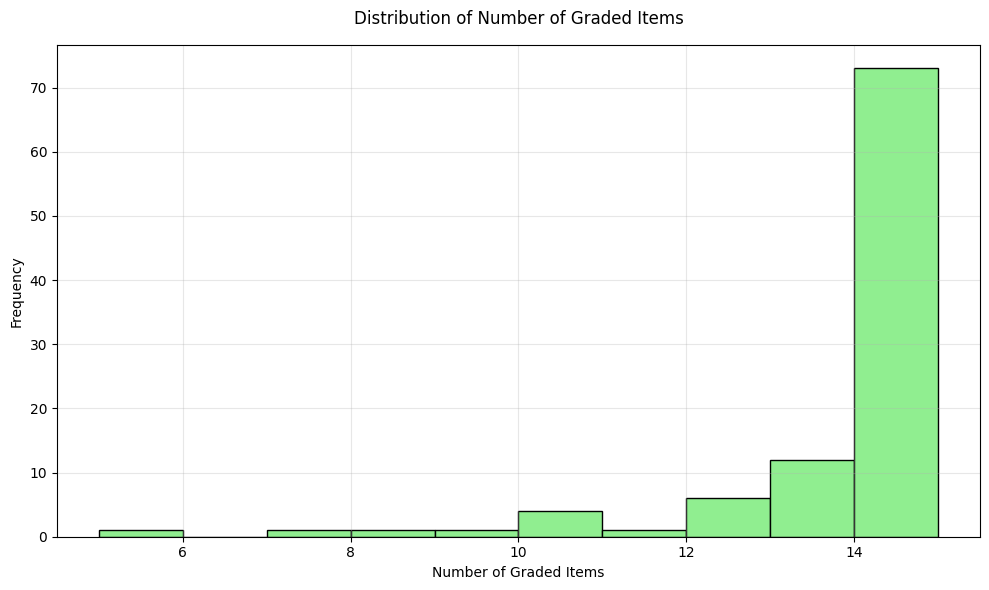

In [42]:
plt.figure(figsize=(10, 6))
plt.hist(h_graded_results['n_graded'], color='lightgreen', edgecolor='black')
plt.title('Distribution of Number of Graded Items', pad=15, fontsize=12)
plt.xlabel('Number of Graded Items', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [43]:
h_full_results

,ResponseId,label,raw,mean,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6,ranking_7
0,R_5vQ6Xf1WugueDND,two chairs,two chairs,1.666667,1.0,1.0,3.0,2.0,2.0,1.0,NaN
1,R_5vQ6Xf1WugueDND,swimming,swimming,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,NaN
2,R_5vQ6Xf1WugueDND,cup,cup,1.166667,1.0,1.0,1.0,2.0,1.0,1.0,NaN
3,R_5vQ6Xf1WugueDND,letter j,letter j,1.833333,4.0,1.0,1.0,2.0,1.0,2.0,NaN
4,R_5vQ6Xf1WugueDND,triangle,triangle,1.500000,1.0,3.0,2.0,1.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1379,R_6YaCnTxmrtmyBmt,cup,cup,4.333333,4.0,4.0,4.0,5.0,5.0,4.0,NaN
1380,R_6YaCnTxmrtmyBmt,gate,gate,1.666667,1.0,1.0,2.0,2.0,2.0,2.0,NaN
1381,R_6YaCnTxmrtmyBmt,present,present,2.833333,1.0,5.0,2.0,3.0,3.0,3.0,NaN
1382,R_6YaCnTxmrtmyBmt,lottery ball,lottery ball,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,NaN


In [44]:
h_ungraded_results

,ResponseId,label,raw
0,R_5vQ6Xf1WugueDND,unsure,unsure
1,R_6D6PBkrChss508l,don't know,Don't know
2,R_6D6PBkrChss508l,looks like a triod with one more,Looks like a triod with one more
3,R_59txcXaWbmO04SW,i imagined two b’s facing outward attached by ...,I imagined two b’s facing outward attached by ...
4,R_59txcXaWbmO04SW,i picked your half a loop with two d’s back to...,I picked your half a loop with two D’s back to...
...,...,...,...
109,R_3hGCmhPK0roMNK6,bulb,bulb
110,R_1PcY1LS2Mfhz64A,hd,HD
111,R_7Kuxq2JKf3BOKPH,sideways t,sideways T
112,R_5RvyCf53JoQh7Eg,no idea,No idea


In [45]:
h_graded_results.to_csv("output_csvs/h_graded_results.csv")
h_full_results.to_csv("output_csvs/h_full_results.csv")
h_ungraded_results.to_csv("output_csvs/h_ungraded_results.csv")

In [46]:
llm_graded_results, llm_full_results, llm_ungraded_results = grade(llm_data, means_with_canon, "Model")

In [47]:
llm_graded_results

,Model,overall_score,n_graded,n_ungraded,n_total,mean_score_per_item
0,Gemini 2.5 Pro Multiple Context (2025-07-21),122.314286,52,8,60,2.038571
1,OpenAI o3 Multiple Context (2025-07-21),163.352381,57,3,60,2.722540
2,OpenAI ChatGPT-4o Single Context (2025-07-25),109.900000,55,5,60,1.831667
3,GPT 4.1 Single Context (2025-07-21),119.961905,55,5,60,1.999365
4,Gemini 2.0 Flash Multiple Context (2025-07-21),107.719048,58,2,60,1.795317
5,OpenAI o4-mini Single Context (2025-07-21),135.942857,55,5,60,2.265714
6,GPT 4.1 Single Context w/ Images (2025-07-21),108.542857,57,3,60,1.809048
7,OpenAI ChatGPT-4o Multiple Context (2025-07-25),118.604762,58,2,60,1.976746
8,OpenAI o3 Pro Multiple Context (2025-07-21),173.847619,50,10,60,2.897460
9,GPT 4.1 Multiple Context (2025-07-21),108.238095,59,1,60,1.803968


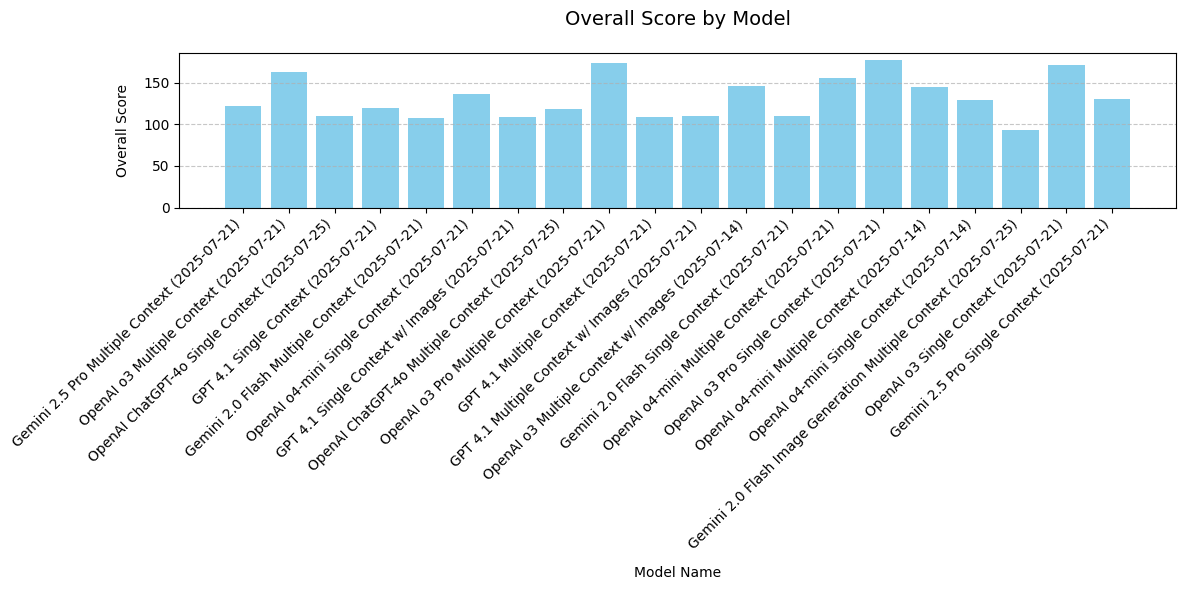

In [48]:
plt.figure(figsize=(12,6))
plt.bar(range(len(llm_graded_results['Model'])), llm_graded_results['overall_score'], color='skyblue')
plt.xticks(range(len(llm_graded_results['Model'])), llm_graded_results['Model'], rotation=45, ha='right')
plt.title('Overall Score by Model', pad=20, size=14)
plt.xlabel('Model Name', labelpad=10)
plt.ylabel('Overall Score', labelpad=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

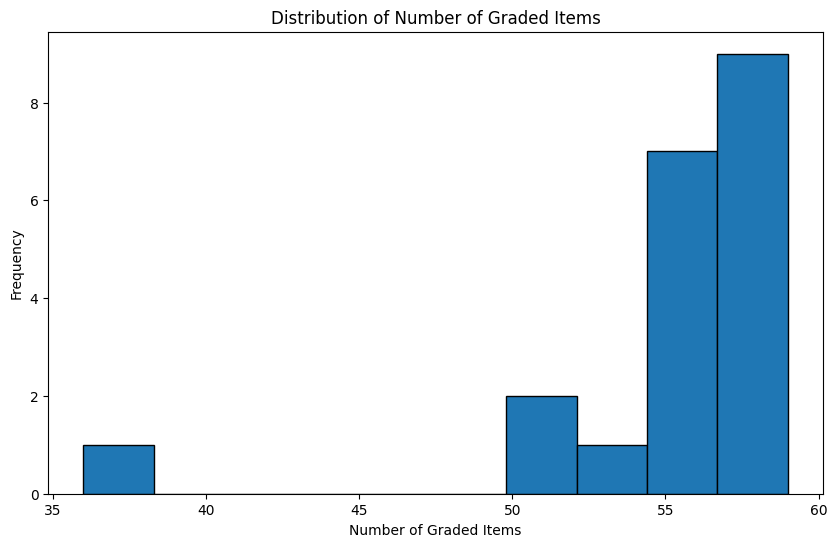

In [49]:
plt.figure(figsize=(10, 6))
plt.hist(llm_graded_results['n_graded'], bins=10, edgecolor='black')
plt.title('Distribution of Number of Graded Items')
plt.xlabel('Number of Graded Items')
plt.ylabel('Frequency')
plt.show()

LLM overall mean score per item: 2.194436507936508


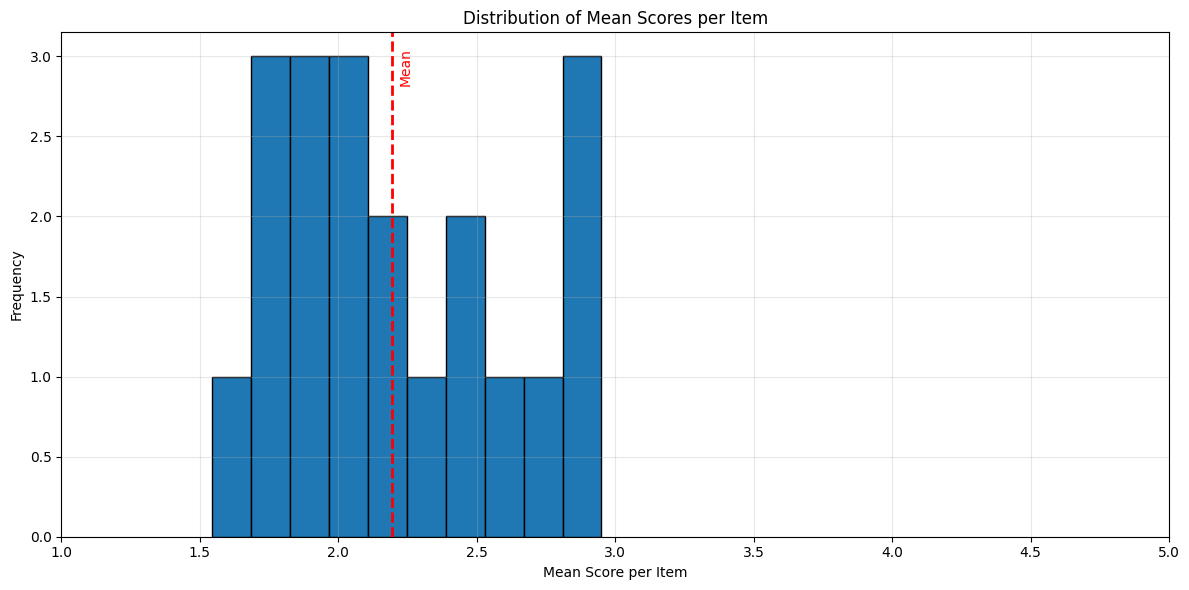

In [50]:
llm_overall_mean = llm_graded_results['overall_score'].sum() / llm_graded_results['n_total'].sum()
print("LLM overall mean score per item:", llm_overall_mean)

plt.figure(figsize=(12, 6))
plt.hist(llm_graded_results['mean_score_per_item'], bins=10, edgecolor='black')
plt.title('Distribution of Mean Scores per Item')
plt.xlabel('Mean Score per Item')
plt.xlim((1, 5))
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.axvline(llm_overall_mean,
            color='red', linestyle='dashed', linewidth=2)
plt.text(llm_overall_mean * 1.01,
         plt.ylim()[1] * 0.9, 'Mean', rotation=90, color='red')
plt.tight_layout()
plt.show()

In [51]:
llm_full_results

,Model,label,raw,mean,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6,ranking_7
0,Gemini 2.5 Pro Multiple Context (2025-07-21),arrow,arrow,2.166667,2.0,2.0,2.0,2.0,3.0,2.0,NaN
1,Gemini 2.5 Pro Multiple Context (2025-07-21),anchor,anchor,1.833333,2.0,2.0,2.0,1.0,1.0,3.0,NaN
2,Gemini 2.5 Pro Multiple Context (2025-07-21),verified icon,Verified icon,1.500000,1.0,2.0,3.0,1.0,1.0,1.0,NaN
3,Gemini 2.5 Pro Multiple Context (2025-07-21),key,key,2.666667,2.0,3.0,2.0,2.0,3.0,4.0,NaN
4,Gemini 2.5 Pro Multiple Context (2025-07-21),sailboat,sailboat,4.833333,5.0,5.0,5.0,4.0,5.0,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1094,Gemini 2.5 Pro Single Context (2025-07-21),cartoon bomb,Cartoon bomb,2.333333,1.0,4.0,2.0,3.0,2.0,2.0,NaN
1095,Gemini 2.5 Pro Single Context (2025-07-21),smoking pipe,Smoking pipe,1.333333,3.0,1.0,1.0,1.0,1.0,1.0,NaN
1096,Gemini 2.5 Pro Single Context (2025-07-21),magnifying glass,Magnifying glass,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,NaN
1097,Gemini 2.5 Pro Single Context (2025-07-21),heart,heart,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,NaN


In [52]:
llm_ungraded_results

,Model,label,raw
0,Gemini 2.5 Pro Multiple Context (2025-07-21),letter z.,Letter Z.
1,Gemini 2.5 Pro Multiple Context (2025-07-21),planted sword.,Planted sword.
2,Gemini 2.5 Pro Multiple Context (2025-07-21),shelf bracket,Shelf bracket
3,Gemini 2.5 Pro Multiple Context (2025-07-21),birdhouse.,Birdhouse.
4,Gemini 2.5 Pro Multiple Context (2025-07-21),winged scepter,Winged Scepter
...,...,...,...
96,Gemini 2.0 Flash Image Generation Multiple Con...,abstract logo.,Abstract logo.
97,OpenAI o3 Single Context (2025-07-21),handcuffs,handcuffs
98,OpenAI o3 Single Context (2025-07-21),signpost,signpost
99,OpenAI o3 Single Context (2025-07-21),trident,trident


In [53]:
llm_graded_results.to_csv("output_csvs/llm_graded_results.csv")
llm_full_results.to_csv("output_csvs/llm_full_results.csv")
llm_ungraded_results.to_csv("output_csvs/llm_ungraded_results.csv")

In [54]:
o3_data = pd.read_csv("input_csvs/o3_phantasia_data.csv")
o3_data

,Model,59,58,57,56,55,54,53,52,51,...,38,39,40,41,42,43,44,45,46,47
0,OpenAI o3 Multiple Context (2025-07-21),Arrow,Umbrella,Hourglass,Registered trademark,Martini glass,smoking pipe,Sailboat,Letter F,Television,...,clubs symbol,clubs suit,Coffee mug,coffee mug,Tic-tac-toe,Power button,Lollipop,key,Hourglass,Asclepius rod
1,OpenAI o3 Pro Multiple Context (2025-07-21),tree,Umbrella,Scissor jack,lowercase r,Martini glass,key,Sailboat,Letter F,television,...,clubs symbol,clubs suit,Coffee mug,Coffee mug,Tic-tac-toe,Power symbol,Magnifying glass,Magnifying glass,eight,Treble clef
2,OpenAI o3 Multiple Context w/ Images (2025-07-14),House,Umbrella,Capital Z,letter k,arrow,music clef,Sailboat,Letter F,Wheelbarrow,...,Shamrock,owl,Coffee mug,Door,Grid,Power button,Dollar sign,Magnifying glass,eight,Dollar sign
3,OpenAI o3 Pro Single Context (2025-07-21),road sign,umbrella,hourglass,clock,martini glass,key,sailboat,signpost,birdhouse,...,clubs symbol,clubs suit,coffee mug,coffee mug,window,question mark,question mark,clock,pop-up toaster,teapot
4,OpenAI o3 Single Context (2025-07-21),tree,umbrella,bow tie,clock,martini glass,key,sailboat,forklift,house,...,clubs symbol,clubs suit,coffee mug,coffee mug,waffle,yo-yo,hot soup,wheelchair,window,anchor


In [55]:
everyone_else_llm_data = pd.concat([llm_data, o3_data]).drop_duplicates(keep=False)
everyone_else_llm_data

,Model,59,58,57,56,55,54,53,52,51,...,38,39,40,41,42,43,44,45,46,47
0,Gemini 2.5 Pro Multiple Context (2025-07-21),arrow,anchor,Letter Z.,Verified icon,Planted sword.,key,sailboat,Shelf bracket,Birdhouse.,...,clubs symbol,owl,Letter B,Shopping cart,window,Royal scepter,Coffee cup,person,anchor,key
2,OpenAI ChatGPT-4o Single Context (2025-07-25),arrow,Umbrella,kite,arrow,Location marker,music clef,keyhole,flagpole,crest,...,butterfly,butterfly,keyhole,Magnifying glass,window,keyhole,butterfly,Magnifying glass,butterfly,butterfly
3,GPT 4.1 Single Context (2025-07-21),arrowhead,Umbrella,Bow tie,Peace sign,Martini glass,music note,sailboat,flagpole,key,...,Mickey Mouse,Ice cream,flagpole,Flag pole,Pound sign,lollipop,Musical note,Magnifying glass,spade,Treble clef
4,Gemini 2.0 Flash Multiple Context (2025-07-21),arrowhead,Hanging scale,hashtag,Partial logo.,arrowhead,Paperclip,Golf club,crosshair,keyhole,...,snowman,Love knot,keyhole,Paperclip holder,grid,Snake donut,swan,Hanging target.,hourglass,Dollar sign
5,OpenAI o4-mini Single Context (2025-07-21),Bird feeder,Umbrella,Truss bridge,Power button,I see a vertical stem topped by a horizontal b...,Bottle opener,Pitching wedge,Step stool,Birdhouse,...,Owl,Scissors,Coffee mug,Staple gun,Pound sign,Eighth note,Sunglasses,key,mustache,Pulley
6,GPT 4.1 Single Context w/ Images (2025-07-21),bridge,Umbrella,Tape dispenser,arm,Pushpin icon,flag,Desk lamp,Letter F,keyhole,...,snowman,snowman,ear,key,hash sign,musical symbol,Swan,Magnifying glass,handcuffs,scissors
7,OpenAI ChatGPT-4o Multiple Context (2025-07-25),campfire,Elephant trunk,hourglass,arrow,anchor,music clef,Flag bracket,flagpole,figure,...,Owl,Abstract person,flagpole,chair,ladder,Dollar sign,snake,Magnifying glass,butterfly,Musical clef
9,GPT 4.1 Multiple Context (2025-07-21),Gymnastics apparatus,Musical clef,Railroad crossing,arm,anchor,Gas pump,Musical note,flagpole,keyhole,...,Ice cream,owl,bed,Pipe clamp,Hash sign,saxophone,Dollar sign,Magnifying glass,Treble clef,Dollar sign
10,GPT 4.1 Multiple Context w/ Images (2025-07-21),Gymnastics apparatus,Pipe wrench,Zorro symbol,Broken letter,anchor,music clef,Flag bracket,Lowercase r,keyhole,...,Mickey Mouse,Infinity symbol,Goal post,Flag pole,Tic-tac-toe,Stethoscope,Dollar sign,LO monogram,heart,Dollar sign
12,Gemini 2.0 Flash Single Context (2025-07-21),house,Fishing hook,windmill,balloon,tree,Golf club,sailboat,Picket fence,Robot arm,...,snowman,Bow tie,Tuning fork,Paper clip,hastag,snake,swan,Fishing pole,Yin yang,teapot


In [56]:
everyone_else_graded_results, _, _ = grade(everyone_else_llm_data, means_with_canon, "Model")

In [57]:
everyone_else_graded_results

,Model,overall_score,n_graded,n_ungraded,n_total,mean_score_per_item
0,Gemini 2.5 Pro Multiple Context (2025-07-21),122.314286,52,8,60,2.038571
1,OpenAI ChatGPT-4o Single Context (2025-07-25),109.900000,55,5,60,1.831667
2,GPT 4.1 Single Context (2025-07-21),119.961905,55,5,60,1.999365
3,Gemini 2.0 Flash Multiple Context (2025-07-21),107.719048,58,2,60,1.795317
4,OpenAI o4-mini Single Context (2025-07-21),135.942857,55,5,60,2.265714
5,GPT 4.1 Single Context w/ Images (2025-07-21),108.542857,57,3,60,1.809048
6,OpenAI ChatGPT-4o Multiple Context (2025-07-25),118.604762,58,2,60,1.976746
7,GPT 4.1 Multiple Context (2025-07-21),108.238095,59,1,60,1.803968
8,GPT 4.1 Multiple Context w/ Images (2025-07-21),110.200000,56,4,60,1.836667
9,Gemini 2.0 Flash Single Context (2025-07-21),109.690476,57,3,60,1.828175


Non-o3 LLMs overall mean score per item: 2.003306878306878


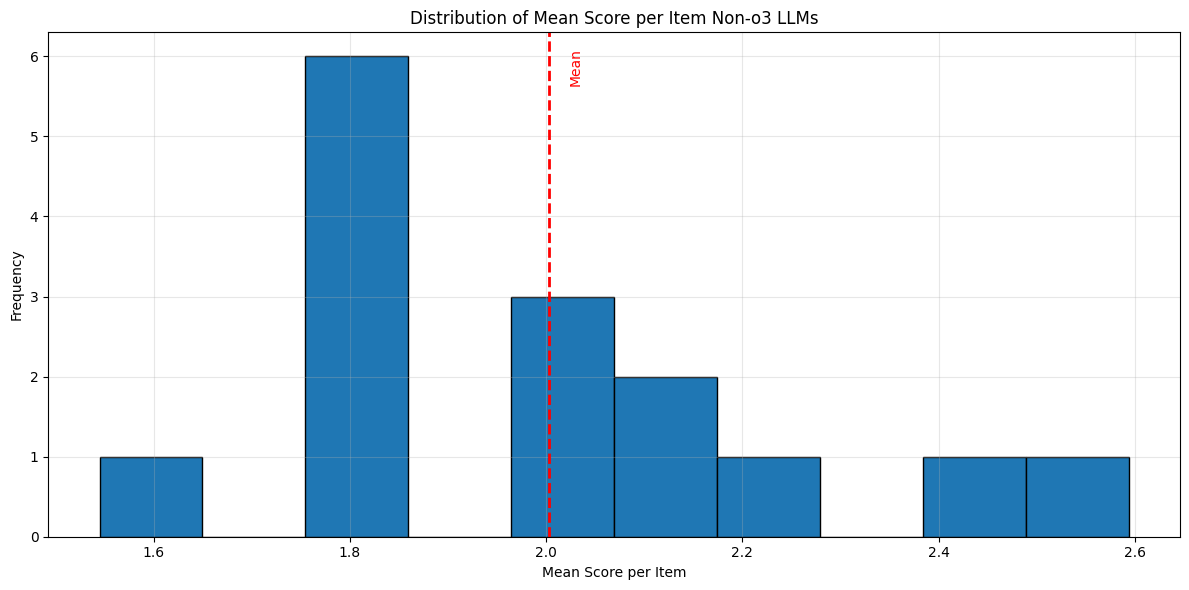

In [58]:
everyone_else_overall_mean = everyone_else_graded_results['overall_score'].sum() / everyone_else_graded_results['n_total'].sum()
print("Non-o3 LLMs overall mean score per item:", everyone_else_overall_mean)

plt.figure(figsize=(12,6))
plt.hist(everyone_else_graded_results['mean_score_per_item'], bins=10, edgecolor='black')
plt.title('Distribution of Mean Score per Item Non-o3 LLMs')
plt.xlabel('Mean Score per Item')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.axvline(everyone_else_overall_mean,
            color='red', linestyle='dashed', linewidth=2)
plt.text(everyone_else_overall_mean * 1.01,
         plt.ylim()[1] * 0.9, 'Mean', rotation=90, color='red')
plt.tight_layout()
plt.show()

In [59]:
o3_graded_results, _, _ = grade(o3_data, means_with_canon, "Model")

In [60]:
o3_graded_results

,Model,overall_score,n_graded,n_ungraded,n_total,mean_score_per_item
0,OpenAI o3 Multiple Context (2025-07-21),163.352381,57,3,60,2.722540
1,OpenAI o3 Pro Multiple Context (2025-07-21),173.847619,50,10,60,2.897460
2,OpenAI o3 Multiple Context w/ Images (2025-07-14),145.485714,53,7,60,2.424762
3,OpenAI o3 Pro Single Context (2025-07-21),177.028571,57,3,60,2.950476
4,OpenAI o3 Single Context (2025-07-21),170.633333,57,3,60,2.843889


o3 overall mean score per item: 2.767825396825397
o3 overall mean score per item (no images): 2.85359126984127


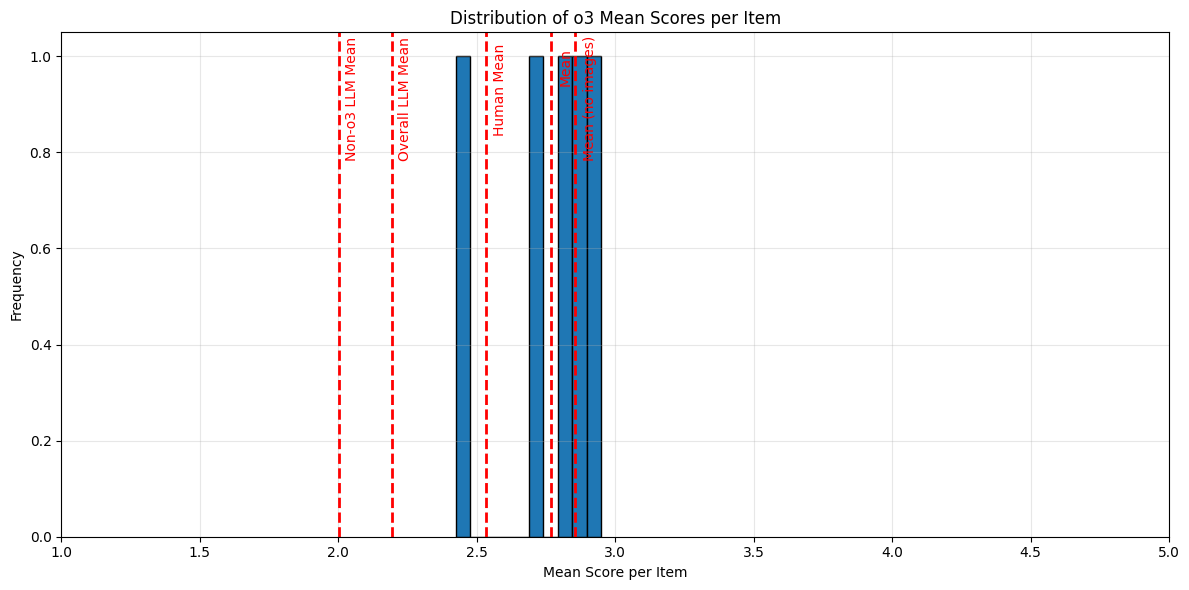

In [61]:
o3_overall_mean = o3_graded_results['overall_score'].sum() / o3_graded_results['n_total'].sum()
o3_no_images = o3_graded_results.drop(2)
o3_mean_no_images = o3_no_images['overall_score'].sum() / o3_no_images['n_total'].sum()
print("o3 overall mean score per item:", o3_overall_mean)
print("o3 overall mean score per item (no images):", o3_mean_no_images)

plt.figure(figsize=(12, 6))
plt.hist(o3_graded_results['mean_score_per_item'], edgecolor='black')
plt.title('Distribution of o3 Mean Scores per Item')
plt.xlabel('Mean Score per Item')
plt.xlim((1, 5))
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.axvline(o3_overall_mean,
            color='red', linestyle='dashed', linewidth=2)
plt.text(o3_overall_mean * 1.01,
         plt.ylim()[1] * 0.9, 'Mean', rotation=90, color='red')
plt.axvline(o3_mean_no_images,
            color='red', linestyle='dashed', linewidth=2)
plt.text(o3_mean_no_images * 1.01,
         plt.ylim()[1] * 0.75, 'Mean (no images)', rotation=90, color='red')
plt.axvline(h_overall_mean,
            color='red', linestyle='dashed', linewidth=2)
plt.text(h_overall_mean * 1.01,
         plt.ylim()[1] * 0.8, 'Human Mean', rotation=90, color='red')
plt.axvline(llm_overall_mean,
            color='red', linestyle='dashed', linewidth=2)
plt.text(llm_overall_mean * 1.01,
         plt.ylim()[1] * 0.75, 'Overall LLM Mean', rotation=90, color='red')
plt.axvline(everyone_else_overall_mean,
            color='red', linestyle='dashed', linewidth=2)
plt.text(everyone_else_overall_mean * 1.01,
         plt.ylim()[1] * 0.75, 'Non-o3 LLM Mean', rotation=90, color='red')
plt.tight_layout()
plt.show()